# Analytical Review of Employment Trends in the European Labour Market

In [11]:
# Importing Libraries for the project
import gzip
import shutil
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Path to the .gz file and the output CSV file
gz_file_path = 'lfsq_ergacob_linear.csv.gz'
csv_file_path = 'lfsq_ergacob_linear.csv'

# Extracting the .gz file
with gzip.open(gz_file_path, 'rb') as f_in:
    with open(csv_file_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Loading the data
df = pd.read_csv(csv_file_path)

In [13]:
# Cleaning the dataset
df_cleaned = df.dropna(subset=['OBS_VALUE'])  # Dropping rows with missing OBS_VALUE
df_cleaned = df_cleaned.drop(columns=['OBS_FLAG', 'DATAFLOW', 'LAST UPDATE'])  # Dropping unnecessary columns

# Converting TIME_PERIOD to datetime and handle the quarterly format
df_cleaned['TIME_PERIOD'] = pd.to_datetime(df_cleaned['TIME_PERIOD'].str.replace(r'Q(\d)', r'-\1', regex=True), errors='coerce')

In [14]:
# Setting pandas display options to show the dataframe in a tabular form
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Displaying the first few rows of the cleaned dataframe
display(df_cleaned.head())

# Saving the cleaned dataset to a new CSV file
df_cleaned.to_csv('lfsq_ergacob_linear_cleaned.csv', index=False)

,freq,c_birth,sex,age,unit,geo,TIME_PERIOD,OBS_VALUE
73,Q,EU27_2020_FOR,F,Y15-19,PC,AT,2019-04-01,28.9
87,Q,EU27_2020_FOR,F,Y15-19,PC,AT,2023-02-01,30.6
202,Q,EU27_2020_FOR,F,Y15-19,PC,CH,2001-02-01,42.4
203,Q,EU27_2020_FOR,F,Y15-19,PC,CH,2003-02-01,39.8
204,Q,EU27_2020_FOR,F,Y15-19,PC,CH,2004-02-01,48.4


In [17]:
# Exploratory Data Analysis
# Descriptive statistics
display(df_cleaned.describe())

,OBS_VALUE
count,1.353e+06
mean,5.887e+01
std,2.280e+01
min,1.000e-01
25%,4.720e+01
50%,6.370e+01
75%,7.590e+01
max,1.000e+02


In [18]:
# Setting searborn style for data vizualizations
sns.set_style("whitegrid")

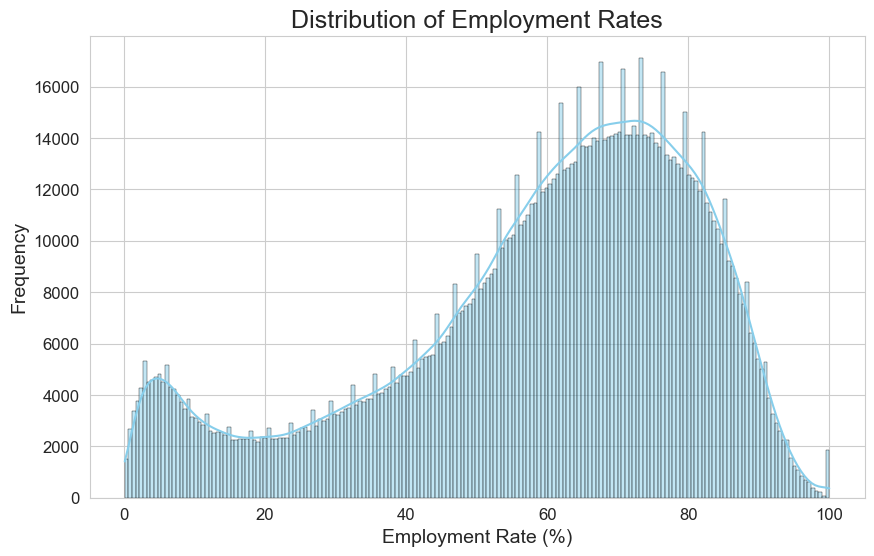

In [19]:
# Visualizing the distribution of employment rates
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['OBS_VALUE'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Employment Rates', fontsize=18)
plt.xlabel('Employment Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()